In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load the dataset
file_path = '../combined_training_data_01.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Split the data into features and labels
X = data[['delta3_1', 'delta3_2', 'delta2_1']]
y = data['label'].values

# print(activity_features)
# Encode labels: Transform categorical labels into numerical values.
label_encoder = LabelEncoder()
# Fit: extract unique classes from dataset Transform: converts the labels to numerical values.
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets. (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
num_estimators = 200
rand_state = 42
clf = RandomForestClassifier(n_estimators=num_estimators, random_state=rand_state)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(f"Accuracy:{accuracy_score(y_test, y_pred)*100:.2f}%" )
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Save the model for future use
joblib.dump(clf, 'activity_classifier_RD.pkl')

Accuracy:87.83%
Classification Report:
              precision    recall  f1-score   support

         lay       0.97      0.98      0.97      1305
     lay_sit       0.42      0.22      0.29       172
   lay_stand       0.45      0.24      0.31       205
         sit       0.87      0.99      0.93      2767
     sit_lay       0.58      0.23      0.33        30
   sit_stand       0.54      0.16      0.24       247
       stand       0.93      0.94      0.93      3625
   stand_lay       0.66      0.67      0.66       508
   stand_sit       0.62      0.47      0.53       300

    accuracy                           0.88      9159
   macro avg       0.67      0.54      0.58      9159
weighted avg       0.86      0.88      0.86      9159



['activity_classifier_RD.pkl']

In [1]:
# Plot the confusion matrix
def plot_conf_matrix(conf_matrix, fmt, title):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt=fmt, cmap="RdYlGn", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()


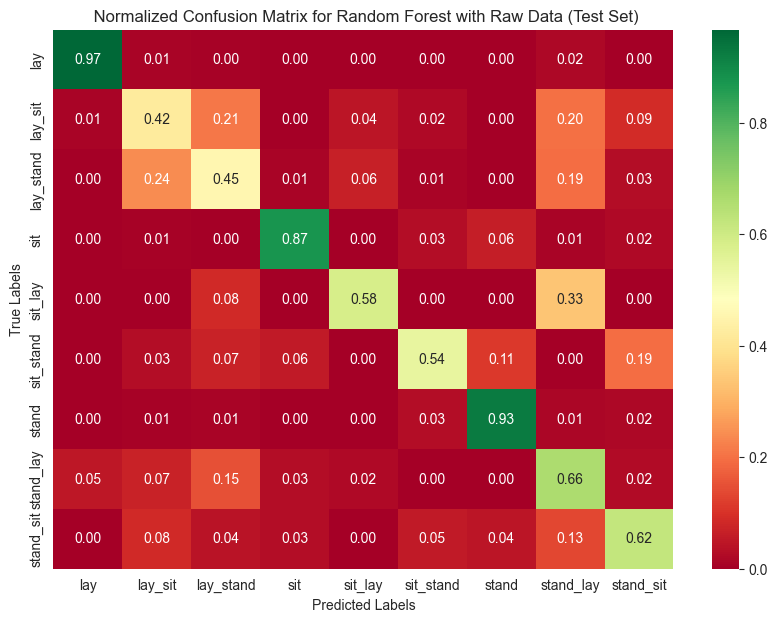

In [31]:

# Generate the confusion matrix
cm = confusion_matrix(y_pred, y_test)

# Normalize the values along rows
row_sums = cm.sum(axis=1, keepdims=True)
# column_sums = cm.sum(axis=1, keepdims=True)
cm_normalized = cm.astype('float') / np.where(row_sums != 0, row_sums, 1)

# Handle zero cases
cm_normalized[np.isnan(cm_normalized)] = 0

plot_conf_matrix(cm_normalized, ".2f", ' Normalized Confusion Matrix for Random Forest with Raw Data (Test Set)')

In [24]:
'''
This is used to classify unlabeled data
'''
# Load the saved model
clf = joblib.load('activity_classifier_RD.pkl')

# Load the new data
new_data_path = '../combined_training_data_01.csv'  # Replace with the actual file path
new_data = pd.read_csv(new_data_path)

# Extract features from the new data
X_new = new_data[['delta3_1', 'delta3_2', 'delta2_1']]
y_new = new_data['label']

# Predict the labels for the new data
predicted_labels = clf.predict(X_new)

# Decode the label names
predicted_labels_names = label_encoder.inverse_transform(predicted_labels)

# Add the predicted labels to the new data
new_data['predicted_label'] = predicted_labels_names
new_data['label'] = y_new

# Save the new data with predictions
new_data.to_csv('labeled_data_with_predictions_RF_RD.csv', index=False)

print("Predictions have been added to the new data and saved to 'labeled_data_with_predictions_RF_MV.csv'")

Predictions have been added to the new data and saved to 'labeled_data_with_predictions_RF_MV.csv'


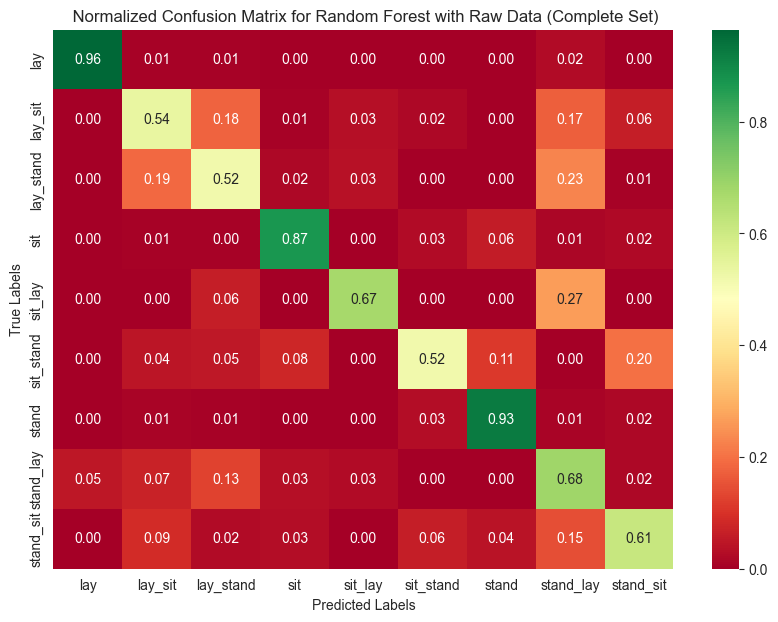

In [30]:
# Generate the confusion matrix
cm = confusion_matrix(new_data['predicted_label'], new_data['label'])

# Normalize the values along rows
row_sums = cm.sum(axis=1, keepdims=True)
# column_sums = cm.sum(axis=1, keepdims=True)
cm_normalized = cm.astype('float') / np.where(row_sums != 0, row_sums, 1)

# Handle zero cases
cm_normalized[np.isnan(cm_normalized)] = 0

# plot_conf_matrix(cm, 'd', 'Confusion Matrix for Random Forest with Raw Data, Mean, and Variance')
plot_conf_matrix(cm_normalized, ".2f", ' Normalized Confusion Matrix for Random Forest with Raw Data (Complete Set)')


['stand' 'stand_sit' 'sit' 'sit_stand' 'stand_lay' 'lay' 'lay_sit'
 'lay_stand' 'sit_lay']


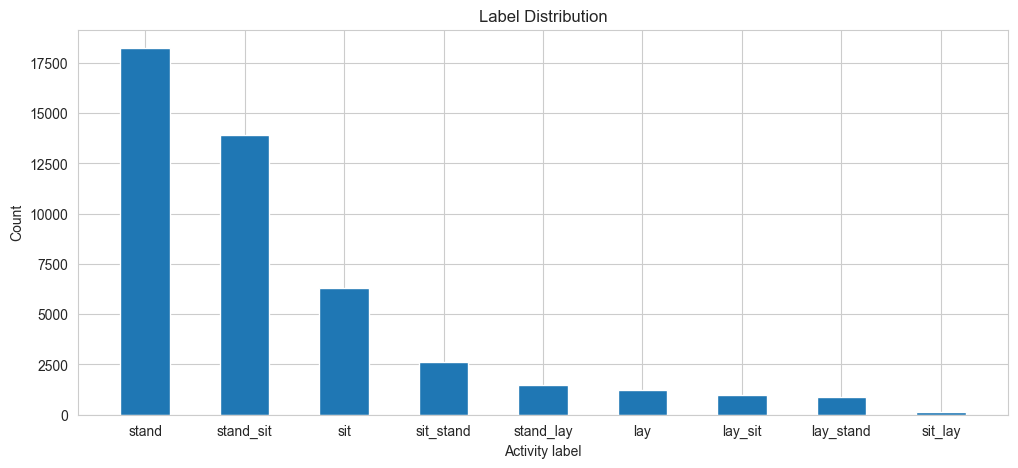

In [28]:
unique_labels = new_data['label'].unique()
print(unique_labels)

value_counts_labels = new_data['label'].value_counts()
# print(value_counts_labels)

# plot the label counts over all activities, using x and y axes:
def plot_stats(labels, label_count):
  plt.figure(figsize=(12, 5))
  plt.bar(labels, label_count, width=0.5)
  plt.xlabel('Activity label')
  plt.ylabel('Count')
  plt.title('Label Distribution')
  plt.show()

plot_stats(unique_labels, value_counts_labels)